<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/NumPy_Pandas_Matplotlib_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# 1. Setup and Data Preparation:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
try:
    df = pd.read_csv('train.csv')
except FileNotFoundError:
    url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/Titanic.csv'
    df = pd.read_csv(url)

# Inspect the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head()) # Display first few rows
print("\nInformation about the dataset:")
df.info() # Show DataFrame summary
print("\nDescriptive statistics of the numerical columns:")
df.describe() # Get statistical overview


First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# 2. NumPy Operations:

# Create arrays
arr1d = np.array([1, 2, 3, 4, 5]) # 1D array
arr2d = np.array([[1, 2], [3, 4]]) # 2D array
arr3d = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]]) # 3D array

print("\n1D Array:", arr1d)
print("2D Array:\n", arr2d)
print("3D Array:\n", arr3d)

# Element-wise operations
arr_a = np.array([10, 20, 30])
arr_b = np.array([2, 3, 4])
print("\nElement-wise addition:", arr_a + arr_b) # Add corresponding elements
print("Element-wise multiplication:", arr_a * arr_b) # Multiply corresponding elements

# Mathematical functions
print("\nSquare root of arr_a:", np.sqrt(arr_a)) # Element-wise square root
print("Sine of arr_b:", np.sin(arr_b)) # Element-wise sine

# Reshape arrays
arr_reshaped = arr1d.reshape(5, 1) # Reshape to 5x1
print("\nReshaped arr1d (5x1):\n", arr_reshaped)

# Concatenate arrays
arr_hstacked = np.hstack((arr_a, arr_b)) # Horizontal stack
arr_vstacked = np.vstack((arr_a.reshape(1, -1), arr_b.reshape(1, -1))) # Vertical stack
print("\nHorizontally stacked:", arr_hstacked)
print("Vertically stacked:\n", arr_vstacked)


1D Array: [1 2 3 4 5]
2D Array:
 [[1 2]
 [3 4]]
3D Array:
 [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]

Element-wise addition: [12 23 34]
Element-wise multiplication: [ 20  60 120]

Square root of arr_a: [3.16227766 4.47213595 5.47722558]
Sine of arr_b: [ 0.90929743  0.14112001 -0.7568025 ]

Reshaped arr1d (5x1):
 [[1]
 [2]
 [3]
 [4]
 [5]]

Horizontally stacked: [10 20 30  2  3  4]
Vertically stacked:
 [[10 20 30]
 [ 2  3  4]]


In [11]:
# 3. Pandas DataFrame Manipulation:

# Select columns
age_sex = df[['Age', 'Sex']] # Select 'Age' and 'Sex'
print("\nSelected 'Age' and 'Sex' columns:\n", age_sex.head())

# Filter rows
adult_males = df[(df['Age'] >= 18) & (df['Sex'] == 'male')] # Filter for adult males
print("\nAdult males:\n", adult_males.head())

# Apply a function (example: categorize age)
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['Age_Category'] = df['Age'].apply(categorize_age) # Apply age categorization
print("\nDataFrame with 'Age_Category':\n", df[['Age', 'Age_Category']].head())

# Group data and aggregate
survival_by_sex = df.groupby('Sex')['Survived'].mean() # Survival rate by sex
print("\nSurvival rate by sex:\n", survival_by_sex)

# Handle missing values (fill NaN in 'Age' with the mean)
df['Age'].fillna(df['Age'].mean(), inplace=True) # Fill missing 'Age'
print("\nMissing 'Age' values filled with the mean:")
print(df['Age'].isnull().sum()) # Check remaining missing

# Handle missing values (drop rows with NaN in 'Embarked')
df.dropna(subset=['Embarked'], inplace=True) # Drop rows with missing 'Embarked'
print("\nDataFrame after dropping rows with missing 'Embarked':")
print(df['Embarked'].isnull().sum()) # Check remaining missing


Selected 'Age' and 'Sex' columns:
     Age     Sex
0  22.0    male
1  38.0  female
2  26.0  female
3  35.0  female
4  35.0    male

Adult males:
     PassengerId  Survived  Pclass                            Name   Sex   Age  \
0             1         0       3         Braund, Mr. Owen Harris  male  22.0   
4             5         0       3        Allen, Mr. William Henry  male  35.0   
6             7         0       1         McCarthy, Mr. Timothy J  male  54.0   
12           13         0       3  Saundercock, Mr. William Henry  male  20.0   
13           14         0       3     Andersson, Mr. Anders Johan  male  39.0   

    SibSp  Parch     Ticket     Fare Cabin Embarked  
0       1      0  A/5 21171   7.2500   NaN        S  
4       0      0     373450   8.0500   NaN        S  
6       0      0      17463  51.8625   E46        S  
12      0      0  A/5. 2151   8.0500   NaN        S  
13      1      5     347082  31.2750   NaN        S  

DataFrame with 'Age_Category':
     Age A

<ipython-input-11-9f25fb9697c4>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True) # Fill missing 'Age'


In [12]:
# 4. Data Preprocessing & Transformation:

# Normalize numerical columns ('Fare' as an example)
fare_mean = df['Fare'].mean()
fare_std = df['Fare'].std()
df['Fare_Normalized'] = (df['Fare'] - fare_mean) / fare_std # Normalize 'Fare'
print("\nDataFrame with normalized 'Fare':\n", df[['Fare', 'Fare_Normalized']].head())

# Apply log scaling (example: 'Fare' - adding a small constant to avoid log(0))
df['Fare_Log'] = np.log(df['Fare'] + 1e-6) # Log scale 'Fare'
print("\nDataFrame with log-scaled 'Fare':\n", df[['Fare', 'Fare_Log']].head())

# Convert categorical variables into numerical format using one-hot encoding ('Sex' and 'Embarked')
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True) # One-hot encode
print("\nDataFrame after one-hot encoding 'Sex' and 'Embarked':\n", df.head())


DataFrame with normalized 'Fare':
       Fare  Fare_Normalized
0   7.2500        -0.499958
1  71.2833         0.788503
2   7.9250        -0.486376
3  53.1000         0.422623
4   8.0500        -0.483861

DataFrame with log-scaled 'Fare':
       Fare  Fare_Log
0   7.2500  1.981002
1  71.2833  4.266662
2   7.9250  2.070022
3  53.1000  3.972177
4   8.0500  2.085672

DataFrame after one-hot encoding 'Sex' and 'Embarked':
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35

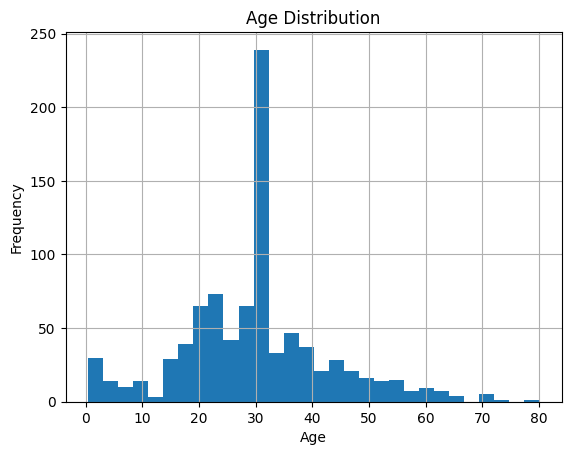

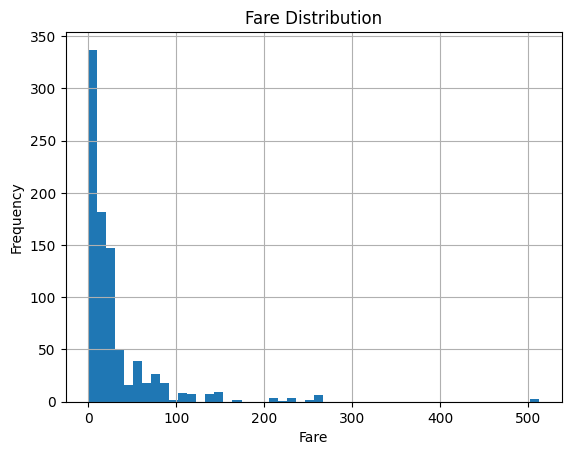

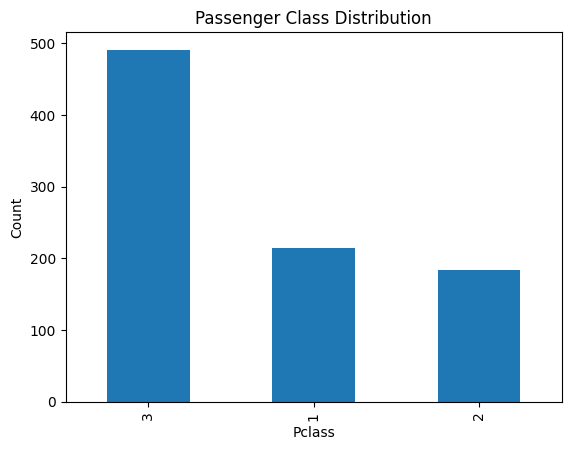

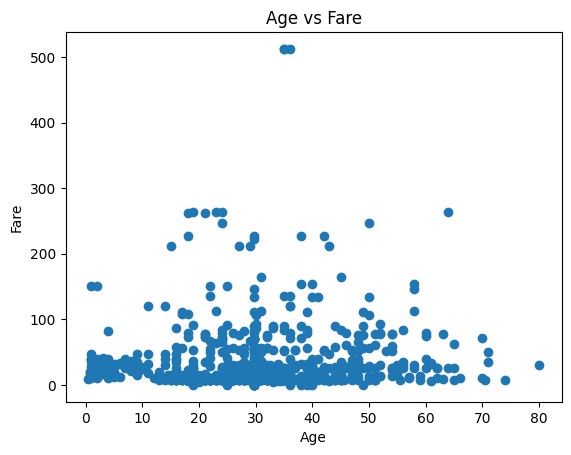

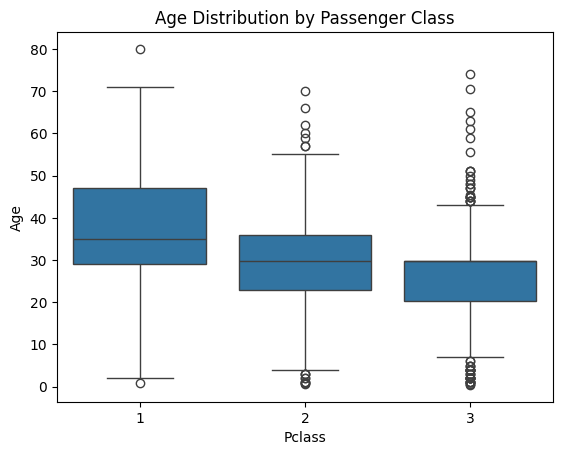

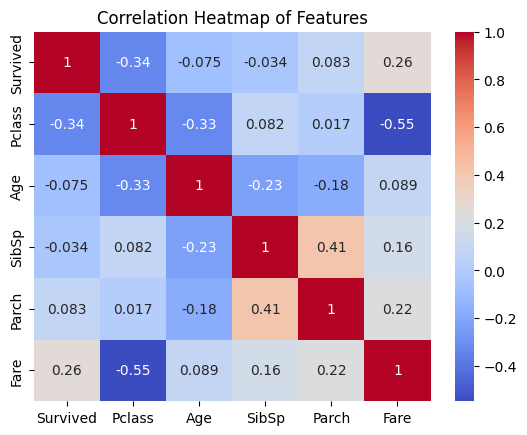

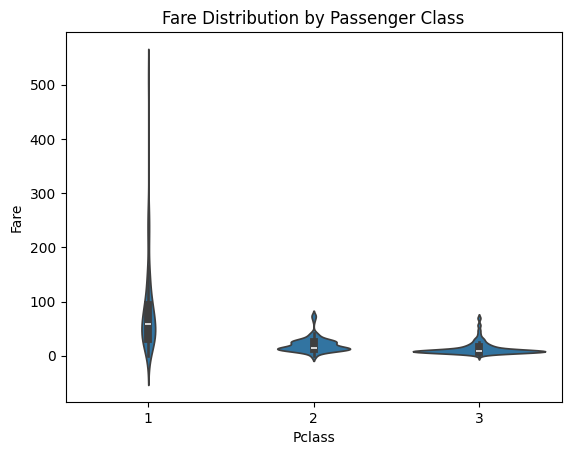

In [13]:
# 5. Data Visualization:

# Generate summary statistics (already done in Step 1 with .describe())

# Visualize distributions using Pandas built-in plotting
df['Age'].hist(bins=30) # Histogram of 'Age'
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

df['Fare'].hist(bins=50) # Histogram of 'Fare'
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

df['Pclass'].value_counts().plot(kind='bar') # Bar chart of 'Pclass'
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Create scatter plot using Matplotlib
plt.scatter(df['Age'], df['Fare']) # Scatter plot of 'Age' vs 'Fare'
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Create box plot using Matplotlib
sns.boxplot(x='Pclass', y='Age', data=df) # Box plot of 'Age' by 'Pclass'
plt.title('Age Distribution by Passenger Class')
plt.show()

# Generate correlation heatmap using Seaborn
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr() # Correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') # Heatmap of correlations
plt.title('Correlation Heatmap of Features')
plt.show()

# Generate violin plot using Seaborn
sns.violinplot(x='Pclass', y='Fare', data=df) # Violin plot of 'Fare' by 'Pclass'
plt.title('Fare Distribution by Passenger Class')
plt.show()

In [14]:
# 6. Fine-tuning and Optimization:

# Optimize DataFrame performance by changing data types (example: 'Pclass' to 'category')
print("\nMemory usage before type change:")
print(df.info(memory_usage='deep')) # Memory usage

df['Pclass'] = df['Pclass'].astype('category') # Change 'Pclass' to category
print("\nMemory usage after changing 'Pclass' to 'category':")
print(df.info(memory_usage='deep')) # Memory usage after change

# Compare execution speeds using %%timeit (in a Colab code cell)
print("\nExecution speed comparison (sum of 'Fare'):")
print("Using Pandas .sum():")
%timeit df['Fare'].sum() # Time Pandas sum

print("\nUsing NumPy np.sum():")
%timeit np.sum(df['Fare']) # Time NumPy sum

# Explore different indexing techniques (already used .loc and boolean indexing implicitly)
# Example using .loc for selection:
adult_fare = df.loc[df['Age'] >= 18, 'Fare'] # Select 'Fare' for adults
print("\nFare for adult passengers (first 5):\n", adult_fare.head()) # Show result


Memory usage before type change:
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      889 non-null    int64  
 1   Survived         889 non-null    int64  
 2   Pclass           889 non-null    int64  
 3   Name             889 non-null    object 
 4   Age              889 non-null    float64
 5   SibSp            889 non-null    int64  
 6   Parch            889 non-null    int64  
 7   Ticket           889 non-null    object 
 8   Fare             889 non-null    float64
 9   Cabin            202 non-null    object 
 10  Age_Category     889 non-null    object 
 11  Fare_Normalized  889 non-null    float64
 12  Fare_Log         889 non-null    float64
 13  Sex_male         889 non-null    bool   
 14  Embarked_Q       889 non-null    bool   
 15  Embarked_S       889 non-null    bool   
dtypes: bool(3), float64(4), int64(5),